<a href="https://colab.research.google.com/github/Jahnavi-Jaolekar/Netflix-clustering/blob/main/Netflix_movies_and_TV_shows_Clustering_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflx movies and tv shows clustering



##### **Project Type**    - Unsupervised
##### **Contribution**    - Team
##### **Team Member 1 - Kaustubh Amare**
##### **Team Member 2 - Md Nawab Ali**
##### **Team Member 3 - Jahnavi Jaolekar**


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
#neccessary packages
!pip install xplotter --upgrade
!pip install pycountry-convert
!pip install geopy
!pip install folium
!pip install geopandas
###################
import pandas as pd
import numpy as np

import missingno as msno

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.cm as cm



%matplotlib inline

# Importing Date & Time util modules
from dateutil.parser import parse

import collections as c


import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

#for nlp
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import string
string.punctuation
nltk.download('omw-1.4')
from nltk.tokenize import TweetTokenizer
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.stem import LancasterStemmer, WordNetLemmatizer

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import scipy.cluster.hierarchy as sch


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Importing Date & Time util modules
from dateutil.parser import parse

import collections as c


# Xplotter
from xplotter.insights import *
from xplotter.formatter import format_spines

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.1 MB 7.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 316 kB 57.8 MB/s 
     |████████████████████████████████| 217 kB 45.6 MB/s 
     |████████████████████████████████| 298 kB 56.8 MB/s 
     |████████████████████████████████| 297 kB 58.4 MB/s 
     |████████████████████████████████| 297 kB 33.6 MB/s 
     |████████████████████████████████| 297 kB 43.2 MB/s 
     |████████████████████████████████| 296 kB 55.2 MB/s 
     |████████████████████████████████| 296 kB 51.8 MB/s 
     |████████████████████████████████| 280 kB 50.6 MB/s 
     |████████████████████████████████| 280 kB 47.9 MB/s 
     |████████████████████████████████

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
nfx_df=pd.read_csv('/content/drive/MyDrive/capstone project 4/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [4]:
# Dataset First Look
nfx_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
rows=nfx_df.shape[0]
columns=nfx_df.shape[1]
print(f'Number of rows in dataset are {rows}')
print(f'Number of columns in dataset are {columns}')

Number of rows in dataset are 7787
Number of columns in dataset are 12


### Dataset Information

In [6]:
# Dataset Info
nfx_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
duplicate = nfx_df.duplicated().sum()
duplicate

0

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
# function for determination of null values, uniques values in columns and there features.
def Complete_columns_info(df):
        mis_val =df.isna().sum()
        mis_val_percent = 100 *df.isna().sum() / len(df)
        unique_val= df.nunique()
        cci_table = pd.concat([mis_val, mis_val_percent, unique_val], axis=1)
        cci_table = cci_table.rename(columns = {0 : 'No of Null Values', 1 : '% of null values', 2 : 'No of unique values' })
        cci_table['Data Type'] = df.dtypes
        cci_table = cci_table.sort_values('% of null values', ascending=False).round(1)
        print (" selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]),"rows")
        return cci_table

In [9]:
# Calling the function
Complete_columns_info(nfx_df)

 selected dataframe has 12 columns and 7787 rows


,No of Null Values,% of null values,No of unique values,Data Type
director,2389,30.7,4049,object
cast,718,9.2,6831,object
country,507,6.5,681,object
date_added,10,0.1,1565,object
rating,7,0.1,14,object
show_id,0,0.0,7787,object
type,0,0.0,2,object
title,0,0.0,7787,object
release_year,0,0.0,73,int64
duration,0,0.0,216,object


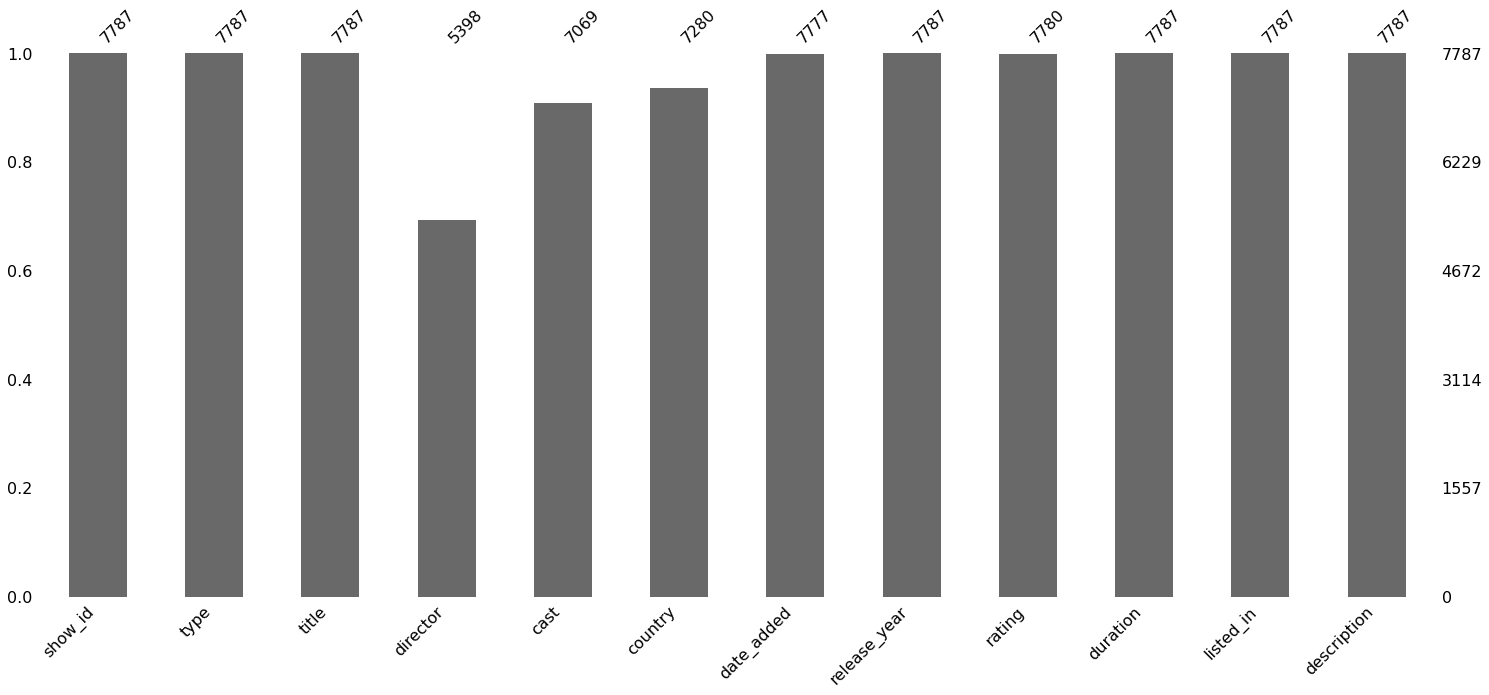

In [10]:
# Visualizing the missing values
msno.bar(nfx_df)

### What did you know about your dataset?

Answer Here - 



*   This dataset has 7787 rows and 12 columns.
*   Dataset is free from duplicate values.

*   Director column has maximum percentage of null values almost 30%, followed by cast and country columns with 9.2 and 6.7 % of null values respectively.
*   All columns have data of object type except release_year which is integer type, which means we have only one numerical column in the dataset.





## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
nfx_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [12]:
# Dataset Describe
nfx_df.describe().round(2).style.background_gradient().set_properties(**{'border': '1.3px solid red',
                          'color': 'black'})

,release_year
count,7787.000000
mean,2013.930000
std,8.760000
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


### Variables Description 

Answer Here - 

#### Column Details

| Field | Description || Field | Description |
|-------|-------------||-------|-------------|
|Show_id|Unique id for every movie/TV show||Release_year|Actual release year of the show|
|Type|Identifier - Movie/tv show||Rating|TV rating of the show|
|Title|Title of the show/movie||Duration|Total duration in minutes or number of seasons|
|Director|Director of the show||Listed_in|Genre|
|Cast|Actors involved||Description|Summary description|
|Country|Country of production||Date_added|Date it was added on netflix|



### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
for col in nfx_df.columns:
  uniques=nfx_df[col].unique()
  print(uniques)

['s1' 's2' 's3' ... 's7785' 's7786' 's7787']
['TV Show' 'Movie']
['3%' '7:19' '23:59' ... 'Zulu Man in Japan' "Zumbo's Just Desserts"
 "ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS"]
[nan 'Jorge Michel Grau' 'Gilbert Chan' ... 'Josef Fares' 'Mozez Singh'
 'Sam Dunn']
['João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi'
 'Demián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato'
 'Tedd Chan, Stella Chung, Henley Hii, Lawrence Koh, Tommy Kuan, Josh Lai, Mark Lee, Susan Leong, Benjamin Lim'
 ...
 'Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanana, Manish Chaudhary, Meghna Malik, Malkeet Rauni, Anita Shabdish, Chittaranjan Tripathy'
 'Nasty C' 'Adriano Zumbo, Rachel Khoo']
['Brazil' 'Mexico' 'Singapore' 'United States' 'Turkey' 'Egypt' 'India'
 'Poland, United States' 'Thailand' 'Nigeria' nan
 'Norway, Iceland, United States' 'United Kingdom' 'Ja

## 3. ***Data Wrangling***

### Data Wrangling Code

In [42]:
# Write your code to make your dataset analysis ready.
# Assigning the Ratings into grouped categories
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'}
nfx_df['target_ages'] = nfx_df['rating'].replace(ratings)

# Type should be a category
nfx_df['type'] = pd.Categorical(nfx_df['type'])
nfx_df['target_ages'] = pd.Categorical(nfx_df['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

# Adding columns of month and year of addition
nfx_df["date_added"] = pd.to_datetime(nfx_df['date_added'])
nfx_df['year'] = nfx_df['date_added'].dt.year
nfx_df['month'] = nfx_df['date_added'].dt.month

#  Creating two extra columns 
tv_shows=nfx_df[nfx_df['type']=='TV Show']
movies=nfx_df[nfx_df['type']=='Movie']

# duration manipulation for movie
movies.duration = movies.duration.str.replace(' min','').astype(int)

# duration manipulation for tv shows
tv_shows.rename(columns={'duration':'seasons'}, inplace=True)
tv_shows.replace({'seasons':{'1 Season':'1 Seasons'}}, inplace=True)
tv_shows.seasons = tv_shows.seasons.str.replace(' Seasons','').astype(int)

# Splitting datasets for movies and tv show
df_movies = nfx_df[nfx_df['type']=='Movie'].copy()
df_shows = nfx_df[nfx_df['type']=='TV Show'].copy()

# changing dtype to string
nfx_df['type']= nfx_df['type'].astype('string')
nfx_df['title']= nfx_df['title'].astype('string')
nfx_df['director']= nfx_df['director'].astype('string')
nfx_df['cast']= nfx_df['cast'].astype('string')
nfx_df['country']= nfx_df['country'].astype('string')
nfx_df['rating']= nfx_df['rating'].astype('string')
nfx_df['listed_in']= nfx_df['listed_in'].astype('string')
nfx_df['description']= nfx_df['description'].astype('string')

### What all manipulations have you done and insights you found?

Answer Here - We assigned rating column different categories, and converted type column into a catgorical column. A new columns month and year have been added using date added column. Now columns make more sense and are understandable. We are ready to perform EDA on our dataset.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

##**Univariate Analysis**

#### Chart - 1

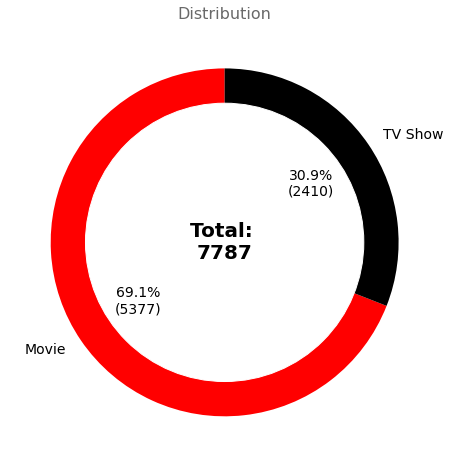

In [15]:
# Chart - 1 visualization code
# pie chart for movie and tv show
plot_donut_chart(df=nfx_df, col='type', colors=['red','black'], title='Distribution')

##### 1. Why did you pick the specific chart?

Answer Here - 

##### 2. What is/are the insight(s) found from the chart?

Answer Here - .

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here - 

#### Chart - 2

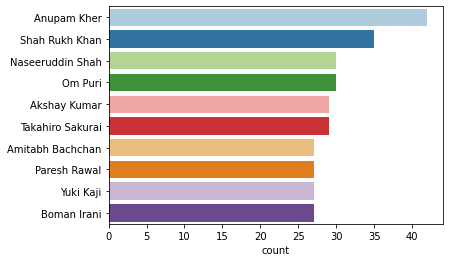

In [16]:
# Chart - 2 visualization code
# Graph for top 10 actors
actors = nfx_df[nfx_df.cast != 'No Cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y = actors, order=actors.value_counts().index[:10], palette='Paired')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here - Bar charts are one of the most common charts representing data and are very informative and easy to comprehend, ans therefore is main reason to use these to present this data.

##### 2. What is/are the insight(s) found from the chart?

Answer Here -  This chart gives us a list of top 10 actors of movies and series, Anupam Kher and Shahrukh Khan are the best rated actors according to this representation followed by Naseeruddin Shah and Om Puri.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

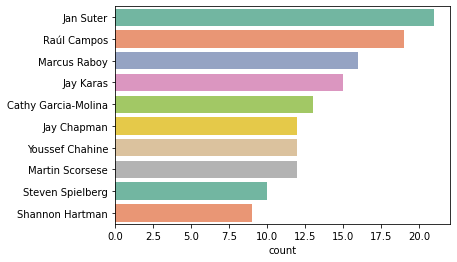

In [17]:
# Chart - 3 visualization code
# Graph for top 10 directors
directors = nfx_df[nfx_df.director != 'No Director'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y = directors, order=directors.value_counts().index[:10], palette='Set2')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here - Here also we have used bar charts to present top 10 directors, as these are best to comprehend, and compare this data.

##### 2. What is/are the insight(s) found from the chart?

Answer Here - Jan Suter, Raul Campous are the leading directors from the list tailed by Marcus Raboy and Jay Karas.
 



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

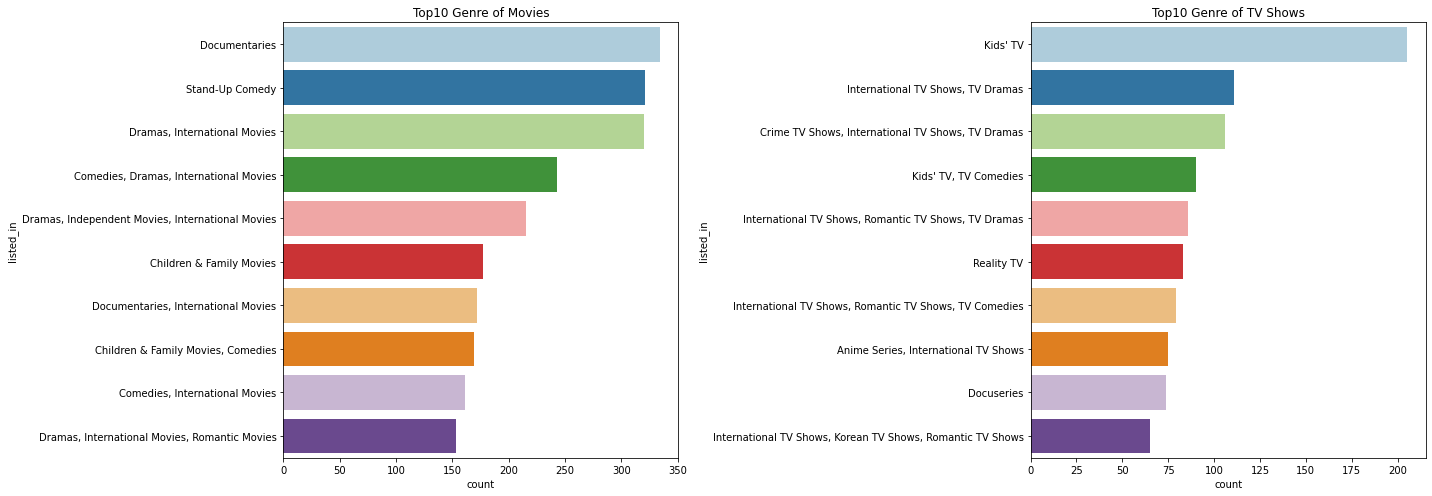

In [18]:
# Chart - 4 visualization code
# #Analysing top10 genre of the movies
figure, ax= plt.subplots(nrows=1, ncols=2, figsize=(20,7))
sns.countplot(y=movies['listed_in'],data=movies,order=movies['listed_in'].value_counts().index[0:10],  palette='Paired', ax=ax[0])
ax[0].set_title('Top10 Genre of Movies')
# #Analysing top10 genres of TVSHOWS
sns.countplot(y=tv_shows['listed_in'],data=tv_shows,order=tv_shows['listed_in'].value_counts().index[0:10], palette='Paired', ax=ax[1])
ax[1].set_title('Top10 Genre of TV Shows')

plt.tight_layout()

##### 1. Why did you pick the specific chart?

Answer Here - Bar charts are used to measure items across classes, here we have different genres as classes from 'listed_in' column, as we want to compare different genres.

##### 2. What is/are the insight(s) found from the chart?

Answer Here - Above plot clearly suggests most of the netflix movies and series are of documentary type, followed by standup comedy and drama genre. This shows that people prefer more these genres as compared to other genre, there are more views to these genres.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here - Producers can have an insight about top genres and can work accordingly, so that they can bring more content of that genre in order to make profit, they can also try to work on other genres and find what they are lacking in other genres that people are not that implicated towards those genres.

#### Chart - 5

Text(0.5, 0, 'Month -> (Movies added to Netflix) ')

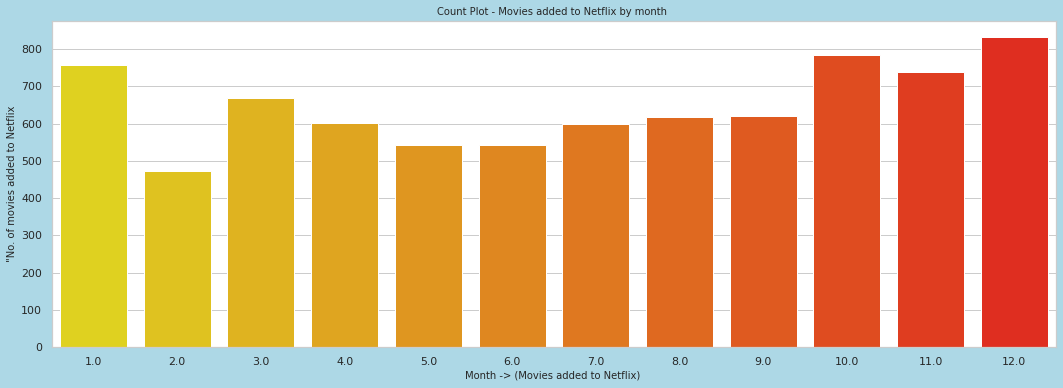

In [19]:
# Chart - 5 visualization code
# Release of movies month-wise
fig = plt.figure(figsize=(18,6))
sns.set(style='whitegrid')
fig.set_facecolor("lightblue")
sns.countplot(data=nfx_df,x = 'month',palette ="autumn_r")
plt.title('Count Plot - Movies added to Netflix by month ', fontsize=10)
plt.ylabel('"No. of movies added to Netflix', fontsize=10)
plt.xlabel('Month -> (Movies added to Netflix) ', fontsize=10)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here - Most of the movies and series are released in the month of October, December and January.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

Text(0.5, 0, 'Year -> (Movies added to Netflix) ')

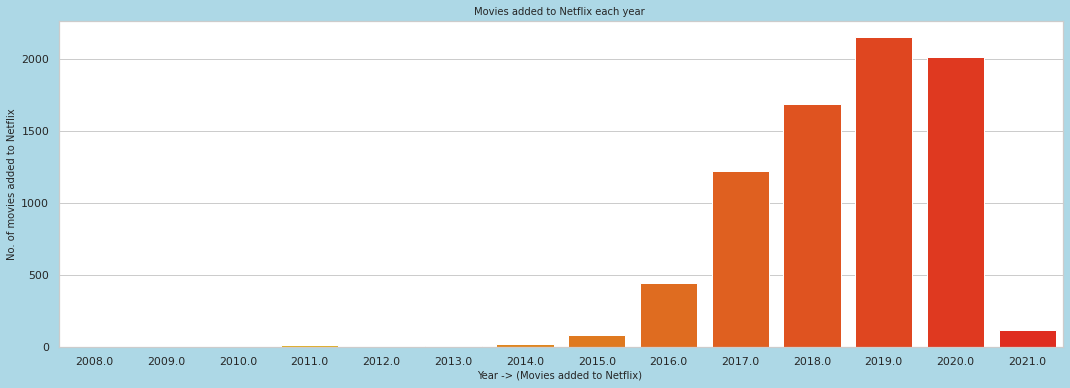

In [20]:
# Chart - 6 visualization code
# Total release for last 10 years
fig = plt.figure(figsize=(18,6))
sns.set(style='whitegrid')
fig.set_facecolor("lightblue")
sns.countplot(data = nfx_df,x = 'year',palette ="autumn_r")
plt.title('Movies added to Netflix each year ', fontsize=10)
plt.ylabel('No. of movies added to Netflix', fontsize=10)
plt.xlabel('Year -> (Movies added to Netflix) ', fontsize=10)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here - Hike was observed in the year 2019 for movie/series release, and then in 2021 there was sudden drop, reason behind this drop may be corona as shooting were cancelled due to pandemic in 2020. Netflix was not trending before 2015 so there were very less infact no releases before 2014.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

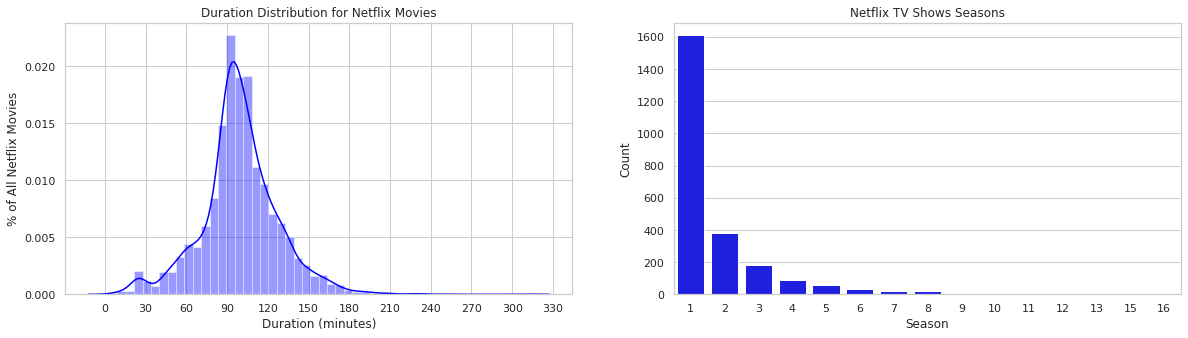

In [21]:
# Chart - 7 visualization code
#ploting a distribution curve for netflix movies duration
fig, ax = plt.subplots(1,2, figsize=(20, 5))
g1 = sns.distplot(movies.duration, color='blue',ax=ax[0]);
g1.set_xticks(np.arange(0,360,30))
g1.set_title("Duration Distribution for Netflix Movies")
g1.set_ylabel("% of All Netflix Movies")
g1.set_xlabel("Duration (minutes)")
#ploting count of seasons fot Netflix TV shows
g2 = sns.countplot(tv_shows.seasons, color='blue',ax=ax[1]);
g2.set_title("Netflix TV Shows Seasons")
g2.set_ylabel("Count")
g2.set_xlabel("Season")
fig.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason

Answer Here.

#### Chart - 8

([<matplotlib.patches.Wedge at 0x7f22e169e940>,
 [Text(-1.0999663543761926, -0.008603443516892913, 'Others'),
  Text(1.1999632956831192, 0.00938557474570121, 'Originals')],
 [Text(-0.5999816478415596, -0.004692787372850679, '50.25%'),
  Text(0.6999785891484862, 0.005474918601659039, '49.75%')])

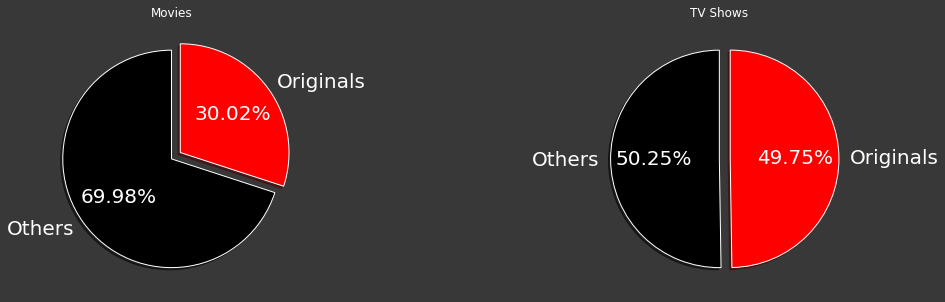

In [22]:
# Chart - 8 visualization code
df_movies['originals'] = np.where(df_movies['release_year'] == df_movies['year'], 'Yes', 'No')
# pie plot showing percentage of originals and others in movies
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,5),facecolor="#383838")
explode = (0, 0.1)
ax[0].set_title('Movies', color='white')
ax[0].pie(df_movies['originals'].value_counts(), explode=explode, autopct='%.2f%%', labels= ['Others', 'Originals'],
       shadow=True, startangle=90,textprops={'color':"white", 'fontsize': 20}, colors =['black','red'])

df_shows['originals'] = np.where(df_shows['release_year'] == df_shows['year'], 'Yes', 'No')
ax[1].set_title('TV Shows', color='white')
ax[1].pie(df_shows['originals'].value_counts(), explode=explode, autopct='%.2f%%', labels= ['Others', 'Originals'],
       shadow=True, startangle=90,textprops={'color':"white", 'fontsize': 20}, colors =['black','red'])

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#**Bivariate Analysis**

#### Chart - 9

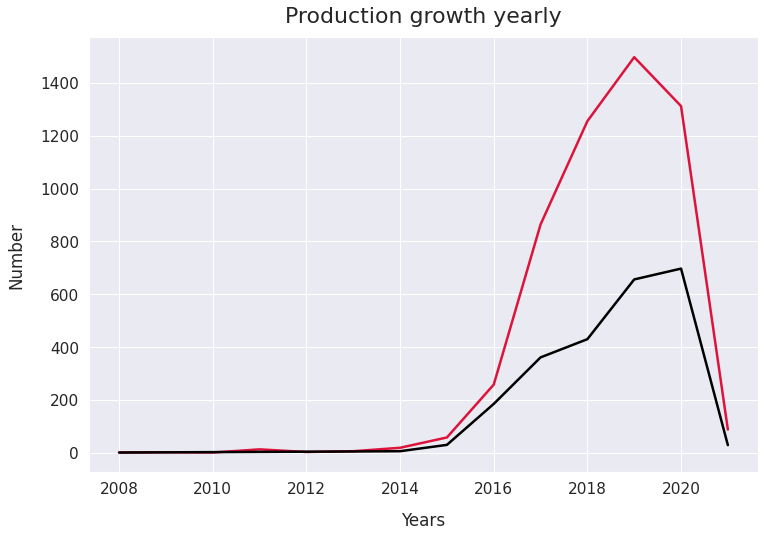

In [23]:
# Chart - 9 visualization code
# visualizing the movies and tv_shows based on the release year
movies_year =movies['year'].value_counts().sort_index(ascending=False)
tvshows_year =tv_shows['year'].value_counts().sort_index(ascending=False)
sns.set(font_scale=1.4)
movies_year.plot(figsize=(12, 8), linewidth=2.5, color='crimson',label="Movies per year",ms=3)
tvshows_year.plot(figsize=(12, 8), linewidth=2.5, color='black',label="TV Shows per year")
plt.xlabel("Years", labelpad=15)
plt.ylabel("Number", labelpad=15)
plt.title("Production growth yearly", y=1.02, fontsize=22);

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

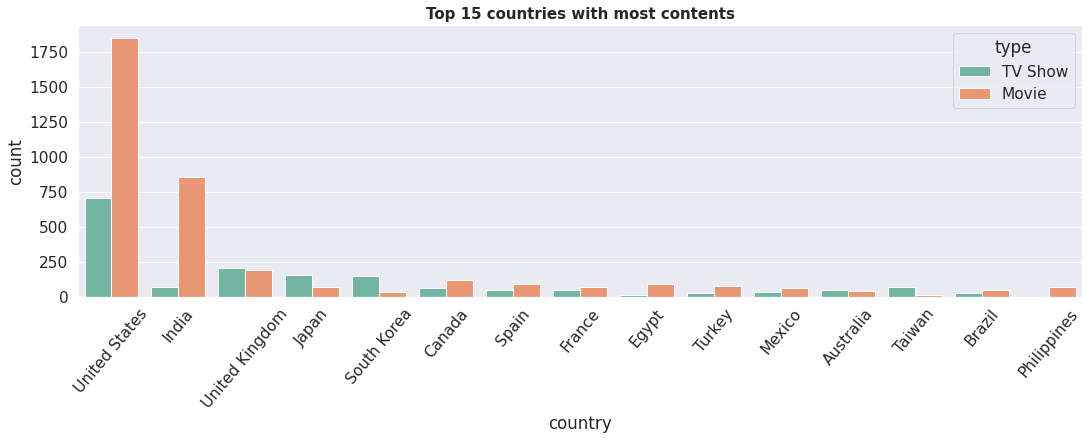

In [24]:
# Chart - 10 visualization code
#Analysing top15 countries with most content 
plt.figure(figsize=(18,5))
sns.countplot(x=nfx_df['country'],order=nfx_df['country'].value_counts().index[0:15],hue=nfx_df['type'], palette='Set2')
plt.xticks(rotation=50)
plt.title('Top 15 countries with most contents', fontsize=15, fontweight='bold')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

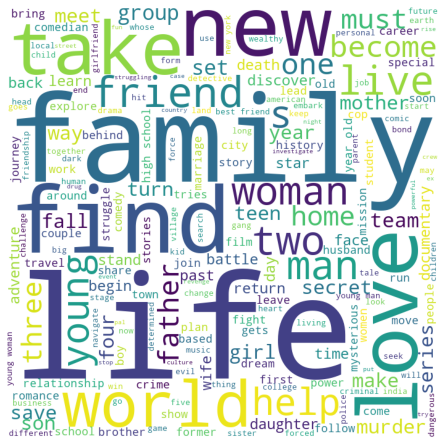

In [25]:
# Chart - 11 visualization code
# Building a wordcloud for the movie descriptions
words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for value in nfx_df.description.values:
    
    # typecaste each val to string
    value = str(value)

    # split the value
    tokens = value.split()
    
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    
    words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 700, height = 700,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(words)


# plot the WordCloud image                      
plt.figure(figsize = (15,6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

<BarContainer object of 11 artists>

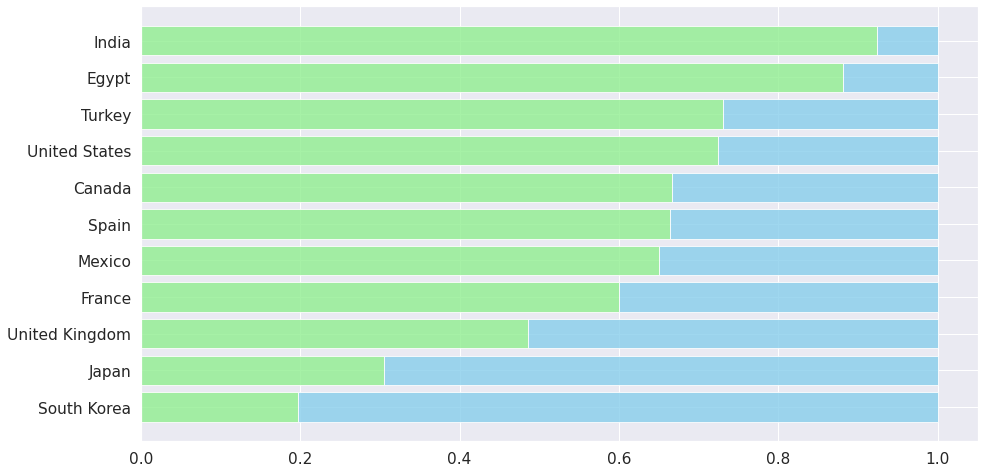

In [26]:
# Chart - 12 visualization code
# Plotting the Horizontal bar plot for top 10 country contains Movie & TV Show split
country_order = nfx_df['country'].value_counts()[:11].index
content_data = nfx_df[['type', 'country']].groupby('country')['type'].value_counts().unstack().loc[country_order]
content_data['sum'] = content_data.sum(axis=1)
content_data_ratio = (content_data.T / content_data['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]

# Plotting the barh
fig, ax = plt.subplots(1,1,figsize=(15, 8))

ax.barh(content_data_ratio.index, content_data_ratio['Movie'], 
        color='lightgreen', alpha=0.8, label='Movie')
ax.barh(content_data_ratio.index, content_data_ratio['TV Show'], left=content_data_ratio['Movie'], 
        color='skyblue', alpha=0.8, label='TV Show') 

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

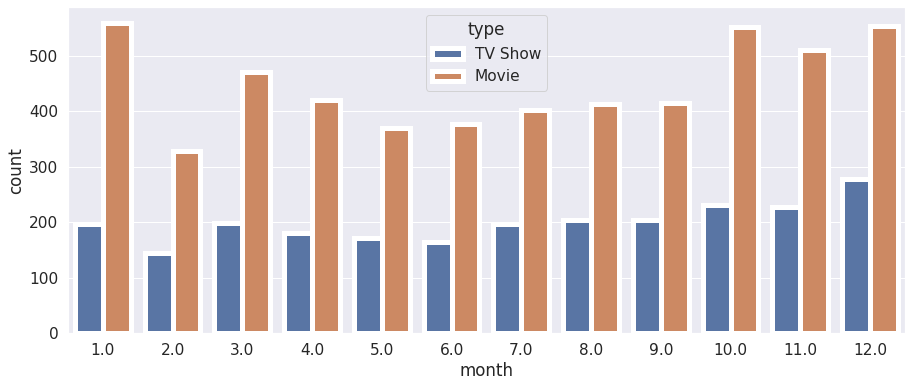

In [27]:
# Chart - 13 visualization code
#ploting monthly release of movies and TV Shows
fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(x='month', hue='type',lw=5, data=nfx_df, ax=ax)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14

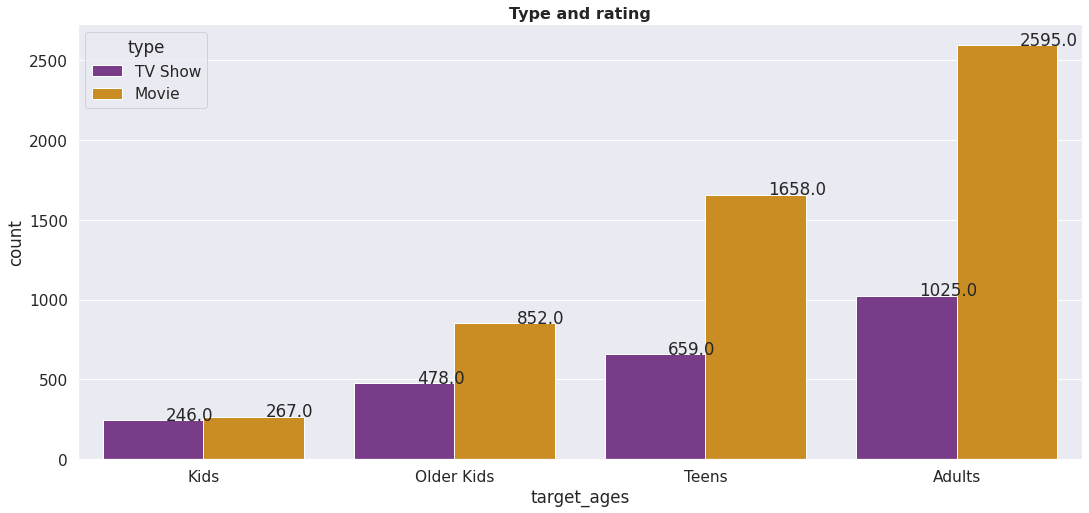

In [28]:
# Chart - 14 visualization code
# Rating
plt.figure(figsize=(18,8))
ax=sns.countplot(x='target_ages',hue='type', data=nfx_df,palette="CMRmap")
plt.title('Type and rating',size='16',fontweight="bold")
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#**Multivariate Analysis**

#### Chart - 14 - Correlation Heatmap

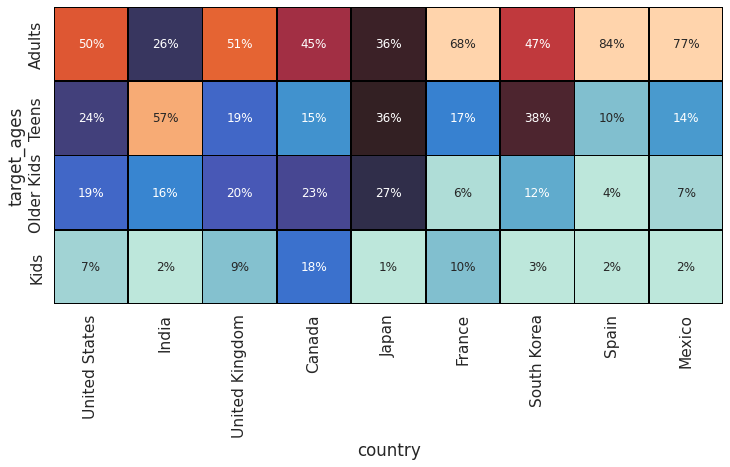

In [29]:
# Correlation Heatmap visualization code
nfx_df['count'] = 1
data = nfx_df.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['country']
heatmap_df = nfx_df.loc[nfx_df['country'].isin(data)]
heatmap_df = pd.crosstab(heatmap_df['country'],heatmap_df['target_ages'],normalize = "index").T

# Plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain',
       'Mexico']
age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']
sns.heatmap(heatmap_df.loc[age_order,country_order2],cmap='icefire',annot=True, linecolor='Black', linewidths=1.0,square=True, cbar=False,
            fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

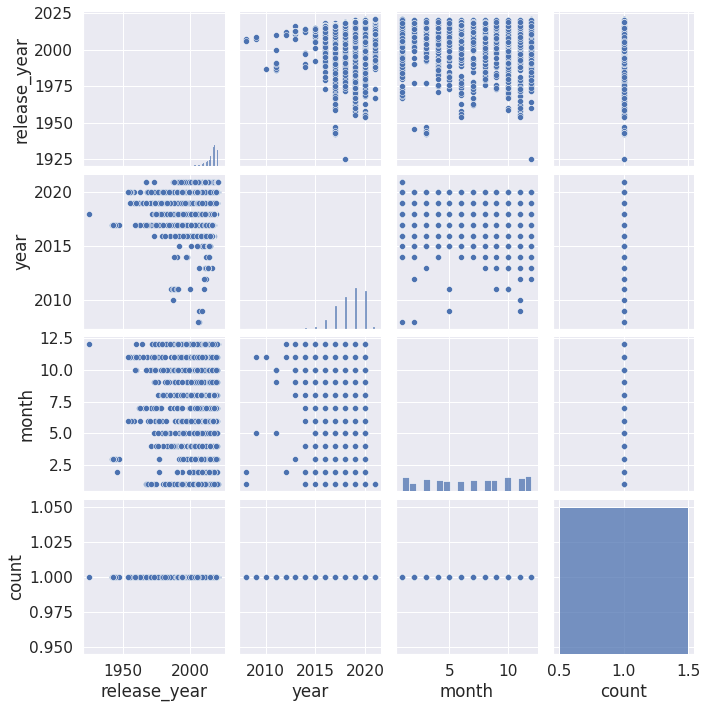

In [30]:
# Pair Plot visualization code
# Checking relation among all the columns once to do further analysis 
sns.pairplot(data=nfx_df)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here:

*   H0:Movies for kids and older kids are two hours long.

*   H1:Movies for kids and older kids are not two hours long.




#### 2. Perform an appropriate statistical test.

In [31]:
# Making copy of df_clean_frame
hypothesis=nfx_df.copy()
hypothesis = hypothesis[hypothesis["type"] == "Movie"]
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
hypothesis['target_ages'] = hypothesis['rating'].replace(ratings_ages)
# Let's see unique target ages 
hypothesis['target_ages'].unique()
hypothesis['target_ages'] = pd.Categorical(hypothesis['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])
# From duration feature extractin string part and after extracting Changing the object type to numeric
hypothesis['duration']= hypothesis['duration'].str.extract('(\d+)')
hypothesis['duration'] = pd.to_numeric(hypothesis['duration'])
# Head of df_
hypothesis.head(3)
# Group_by duration and target_ages                 
group_by_= hypothesis[['duration','target_ages']].groupby(by='target_ages')
# Mean of group_by variable
group=group_by_.mean().reset_index()
group
# In A and B variable grouping values 
one = group_by_.get_group('Kids')
two = group_by_.get_group('Older Kids')
# Mean and std. calutation for kids and older kids variables
Mean1 = one.mean()
SD1 = one.std()

Mean2= two.mean()
SD2 = two.std()

print('Mean for movies rated for Kids {} \n Mean for  movies rated for older kids {}'.format(Mean1,Mean2))
print('Std deviation for  movies rated for Older Kids {} \n Std for  movies rated for kids {}'.format(SD2,SD1))

Mean for movies rated for Kids duration    66.486891
dtype: float64 
 Mean for  movies rated for older kids duration    92.024648
dtype: float64
Std deviation for  movies rated for Older Kids duration    31.182577
dtype: float64 
 Std for  movies rated for kids duration    31.739465
dtype: float64


In [32]:
# Perform Statistical Test to obtain P-Value
# Import stats 
from scipy import stats
# Length of groups and DOF
len1 = len(one)
len2= len(two)
print(len1,len2)

dof = len1+len2-2
print('dof',dof)

sp_2 = ((len2-1)*SD1**2  + (len1-1)*SD2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

# t-value
t_value = (Mean1-Mean2)/(sp * np.sqrt(1/len1 + 1/len2))
print('t-value',t_value[0])

267 852
dof 1117
SP_2 = duration    999.049147
dtype: float64
SP duration    31.607739
dtype: float64
t-value -11.51992627853396


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here:

*   Null Hypothesis(H0) - The Country is independent of Target_ages.
 
*   Alternative Hypothesis(H1) - The Country is associated with Target_ages


#### 2. Perform an appropriate statistical test.

In [33]:
cont_table  = pd.crosstab(nfx_df.country, nfx_df.target_ages)
cont_table

target_ages,Kids,Older Kids,Teens,Adults
country,,,,
Argentina,3,3,7,37
"Argentina, Brazil, France, Poland, Germany, Denmark",0,0,1,0
"Argentina, Chile",0,0,1,0
"Argentina, Chile, Peru",0,0,0,1
"Argentina, France",0,0,0,1
...,...,...,...,...
Venezuela,0,0,1,0
"Venezuela, Colombia",0,0,0,1
Vietnam,1,0,2,2


In [34]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency
X2, p_value, degree_freedom, expected_values = chi2_contingency(cont_table, correction = True)
print("X2: {0}, P-Value: {1}".format(X2,p_value)) 

X2: 3121.6151067654755, P-Value: 8.795776541954996e-49


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here: 

*   Null Hypothesis(H0) - The Duration is independent of Target_ages.
 
*   Alternative Hypothesis(H1) - The Duration is associated with Target_ages.

#### 2. Perform an appropriate statistical test.

In [35]:
cont_table_1  = pd.crosstab(nfx_df.target_ages, nfx_df.duration)
cont_table_1

duration,1 Season,10 Seasons,10 min,100 min,101 min,102 min,103 min,104 min,105 min,106 min,...,90 min,91 min,92 min,93 min,94 min,95 min,96 min,97 min,98 min,99 min
target_ages,,,,,,,,,,,,,,,,,,,,,
Kids,137,1,1,3,0,3,1,2,4,1,...,5,1,6,2,1,3,1,2,2,1
Older Kids,304,2,0,15,9,14,10,17,7,13,...,26,29,26,29,15,19,17,14,15,16
Teens,470,1,0,24,35,29,30,21,29,33,...,28,30,29,32,33,32,38,31,43,28
Adults,695,2,0,55,52,52,60,49,51,50,...,77,65,57,68,76,65,59,70,46,56


In [36]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency
X2, p_value, degree_freedom, expected_values = chi2_contingency(cont_table_1, correction = True)
print("X2: {0}, P-Value: {1}".format(X2,p_value)) 

X2: 1896.6207931717904, P-Value: 2.1740860733939955e-123


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [37]:
# Handling Missing Values & Missing Value Imputation
# Calling our function again to check null values after adding new columns
Complete_columns_info(nfx_df)

 selected dataframe has 16 columns and 7787 rows


,No of Null Values,% of null values,No of unique values,Data Type
director,2389,30.7,4049,string
cast,718,9.2,6831,string
country,507,6.5,681,string
date_added,10,0.1,1512,datetime64[ns]
year,10,0.1,14,float64
month,10,0.1,12,float64
rating,7,0.1,14,string
target_ages,7,0.1,4,category
show_id,0,0.0,7787,object
type,0,0.0,2,string


In [38]:
# Handling Missing Values & Missing Value Imputation
nfx_df['cast'].fillna(value='Unknown',inplace=True)
nfx_df['director'].fillna(value='Unknown',inplace=True)
nfx_df['country'].fillna(value=nfx_df['country'].mode()[0],inplace=True)
nfx_df.dropna(subset=['date_added','rating', 'target_ages', 'year', 'month'],inplace=True)

In [39]:
# Lets check again
Complete_columns_info(nfx_df)

 selected dataframe has 16 columns and 7770 rows


,No of Null Values,% of null values,No of unique values,Data Type
show_id,0,0.0,7770,object
type,0,0.0,2,string
title,0,0.0,7770,string
director,0,0.0,4048,string
cast,0,0.0,6818,string
country,0,0.0,681,string
date_added,0,0.0,1511,datetime64[ns]
release_year,0,0.0,73,int64
rating,0,0.0,14,string
duration,0,0.0,216,object


#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here - 

### 2. Categorical Encoding

In [40]:
# Encode your categorical columns
le = LabelEncoder()
nfx_df["type"] = le.fit_transform(nfx_df["type"])
nfx_df["country"] = le.fit_transform(nfx_df["country"])

nfx_df['rating'] = le.fit_transform(nfx_df['rating'])
nfx_df['listed_in'] = le.fit_transform(nfx_df['listed_in'])

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [43]:
# Expand Contraction
cluster_df = nfx_df[['title']]
cluster_df['cluster_data'] = (nfx_df['description'] + ' ' + nfx_df['listed_in'] + ' ' + nfx_df['director'] + ' ' + nfx_df['cast'] + ' ' + nfx_df['country'] + ' ' + nfx_df['rating']).astype(str)
cluster_df.set_index('title', inplace = True)
cluster_df.head()

,cluster_data
title,
3%,In a future where the elite inhabit an island ...
7:19,After a devastating earthquake hits Mexico Cit...
23:59,"When an army recruit is found dead, his fellow..."
9,"In a postapocalyptic world, rag-doll robots hi..."
21,A brilliant group of students become card-coun...


#### 2. Lower Casing

In [44]:
# Lower Casing
cluster_df['cluster_data'] = cluster_df['cluster_data'].str.lower()

#### 3. Removing Punctuations

In [45]:
# Remove punctuation from the text :
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string 
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)
    
cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(remove_punctuation)
cluster_df.head(5)

,cluster_data
title,
3%,in a future where the elite inhabit an island ...
7:19,after a devastating earthquake hits mexico cit...
23:59,when an army recruit is found dead his fellow ...
9,in a postapocalyptic world ragdoll robots hide...
21,a brilliant group of students become cardcount...


#### 5. Removing Stopwords & Removing White spaces

In [46]:
# Remove Stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words=stopwords.words('english')
def stopwords(text):
    '''a function for removing the stopword'''
    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    return " ".join(text)
cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(stopwords)
cluster_df.cluster_data.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


title
3%       future elite inhabit island paradise far crowd...
7:19     devastating earthquake hits mexico city trappe...
23:59    army recruit found dead fellow soldiers forced...
9        postapocalyptic world ragdoll robots hide fear...
21       brilliant group students become cardcounting e...
Name: cluster_data, dtype: object

#### 8. Text Normalization

In [47]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# create an object of stemming function :
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [48]:
cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(stemming)
cluster_df.head(5)

,cluster_data
title,
3%,futur elit inhabit island paradis far crowd sl...
7:19,devast earthquak hit mexico citi trap survivor...
23:59,armi recruit found dead fellow soldier forc co...
9,postapocalypt world ragdol robot hide fear dan...
21,brilliant group student becom cardcount expert...


In [49]:
bag_of_words = cluster_df.cluster_data

In [50]:
nfx_df['Length(listed_in)'] = nfx_df['listed_in'].apply(lambda x: len(x))
nfx_df['Length(description)'] = nfx_df['description'].apply(lambda x: len(x))

nfx_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,year,month,count,Length(listed_in),Length(description)
0,s1,1,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",39,2020-08-14,2020,8,4 Seasons,397,In a future where the elite inhabit an island ...,NaN,2020,8,1,3,136
1,s2,0,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",308,2016-12-23,2016,8,93 min,309,After a devastating earthquake hits Mexico Cit...,NaN,2016,12,1,3,148
2,s3,0,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",379,2018-12-20,2011,5,78 min,335,"When an army recruit is found dead, his fellow...",NaN,2018,12,1,3,149
3,s4,0,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",549,2017-11-16,2009,4,80 min,47,"In a postapocalyptic world, rag-doll robots hi...",NaN,2017,11,1,2,145
4,s5,0,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",549,2020-01-01,2008,4,123 min,293,A brilliant group of students become card-coun...,NaN,2020,1,1,3,143


##### Which text normalization technique have you used and why?

Answer Here.

#### 10. Text Vectorization

In [51]:
# Text Vectorization
nfx_df['description'] = nfx_df['description'].fillna('')
tfidf = TfidfVectorizer(stop_words='english')

#get the tf-idf scores
#create TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(nfx_df['description'])

#shape of tfidf_matrix
tfidf_matrix.shape

(7770, 17888)

##### Which text vectorization technique have you used and why?

Answer Here.

### 6. Data Scaling

In [52]:
# Scaling your data
from sklearn import preprocessing
X_features = nfx_df[['Length(description)','Length(listed_in)']]
stdscaler = preprocessing.StandardScaler()
X_features.describe()

,Length(description),Length(listed_in)
count,7770.000000,7770.000000
mean,143.101287,2.847876
std,10.618177,0.408777
min,61.000000,1.000000
25%,140.000000,3.000000
50%,146.000000,3.000000
75%,149.000000,3.000000
max,248.000000,3.000000


In [53]:
# Scaling your data
X_rescale=stdscaler.fit_transform(X_features)
X=X_rescale
silhouette_score_ = [  ]
range_n_clusters = [i for i in range(2,16)]

In [54]:
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    silhouette_score_.append([int(n_clusters) , round(score , 2)])
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.7029766134861308
For n_clusters = 3, silhouette score is 0.6632863544729263
For n_clusters = 4, silhouette score is 0.6765728297824126
For n_clusters = 5, silhouette score is 0.6921056369357481
For n_clusters = 6, silhouette score is 0.6539484349119381
For n_clusters = 7, silhouette score is 0.6418464089112803
For n_clusters = 8, silhouette score is 0.6012425440768113
For n_clusters = 9, silhouette score is 0.5909584007154215
For n_clusters = 10, silhouette score is 0.5995147764282908
For n_clusters = 11, silhouette score is 0.5855147388469121
For n_clusters = 12, silhouette score is 0.5752559968417209
For n_clusters = 13, silhouette score is 0.5703863782446303
For n_clusters = 14, silhouette score is 0.5616248653983453
For n_clusters = 15, silhouette score is 0.5770009382065557


##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [55]:
# Dimensionality Reduction (If needed)
pca = PCA(random_state=42)
pca.fit(X)

PCA(random_state=42)

Text(0, 0.5, 'cumulative explained variance')

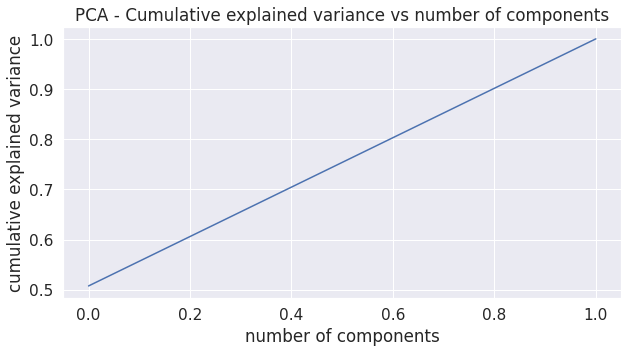

In [56]:
# Cumulative explained variance vs number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [57]:
# Reducing the dimensions using pca
pca = PCA(n_components=2,random_state=42)
pca.fit(X)
x_pca = pca.transform(X)

In [58]:
# Shape of transformed vectors
x_pca.shape

(7770, 2)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

## ***7. ML Model Implementation***

### **ML Model - 1 - K means**

In [59]:
# ML Model - 1 K means
k_clusters = 4
# Fit the Algorithm
model = KMeans(n_clusters=k_clusters, init='k-means++', n_init=10, max_iter=600, tol=0.000001, random_state=42)
model.fit(X)
# Predict on the model
clusters = model.predict(X)

In [60]:
# Evaluate the silhouette score :
score = silhouette_score(X, clusters)
print("Silhouette score is {}".format(score))

Silhouette score is 0.6765728297824126


In [61]:
# Adding a seperate column for the clusters L:
nfx_df["Cluster Label"] = clusters
nfx_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,year,month,count,Length(listed_in),Length(description),Cluster Label
0,s1,1,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",39,2020-08-14,2020,8,4 Seasons,397,In a future where the elite inhabit an island ...,NaN,2020,8,1,3,136,0
1,s2,0,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",308,2016-12-23,2016,8,93 min,309,After a devastating earthquake hits Mexico Cit...,NaN,2016,12,1,3,148,2
2,s3,0,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",379,2018-12-20,2011,5,78 min,335,"When an army recruit is found dead, his fellow...",NaN,2018,12,1,3,149,2
3,s4,0,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",549,2017-11-16,2009,4,80 min,47,"In a postapocalyptic world, rag-doll robots hi...",NaN,2017,11,1,2,145,1
4,s5,0,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",549,2020-01-01,2008,4,123 min,293,A brilliant group of students become card-coun...,NaN,2020,1,1,3,143,2


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [62]:
# Visualizing evaluation Metric Score chart
temp = pd.DataFrame(silhouette_score_ , columns = ["n clusters" , "silhouette score"])
temp = temp.sort_values( "silhouette score" , ascending = False )
temp.head(15) 

,n clusters,silhouette score
0,2,0.70
3,5,0.69
2,4,0.68
1,3,0.66
4,6,0.65
5,7,0.64
6,8,0.60
8,10,0.60
7,9,0.59
9,11,0.59


For n_clusters = 2 The average silhouette_score is : 0.7029766134861308
For n_clusters = 3 The average silhouette_score is : 0.6632863544729263
For n_clusters = 4 The average silhouette_score is : 0.6765728297824126
For n_clusters = 5 The average silhouette_score is : 0.6921056369357481
For n_clusters = 6 The average silhouette_score is : 0.6428451581759512
For n_clusters = 7 The average silhouette_score is : 0.6402705090082136
For n_clusters = 8 The average silhouette_score is : 0.6026907550357826
For n_clusters = 9 The average silhouette_score is : 0.5892058514412684
For n_clusters = 10 The average silhouette_score is : 0.600795995670095
For n_clusters = 11 The average silhouette_score is : 0.575479306312235
For n_clusters = 12 The average silhouette_score is : 0.5721381507549124
For n_clusters = 13 The average silhouette_score is : 0.5751138985119182
For n_clusters = 14 The average silhouette_score is : 0.5585703236757664
For n_clusters = 15 The average silhouette_score is : 0.56820

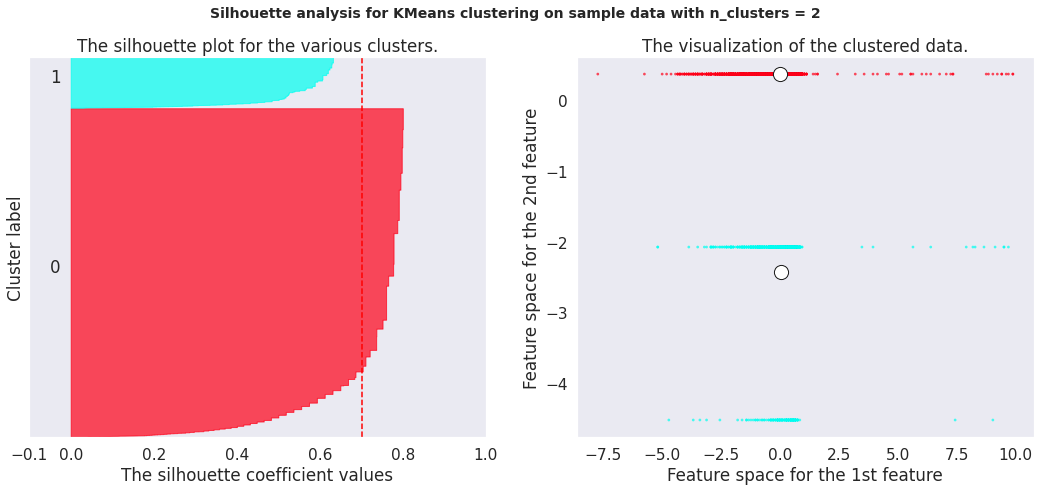

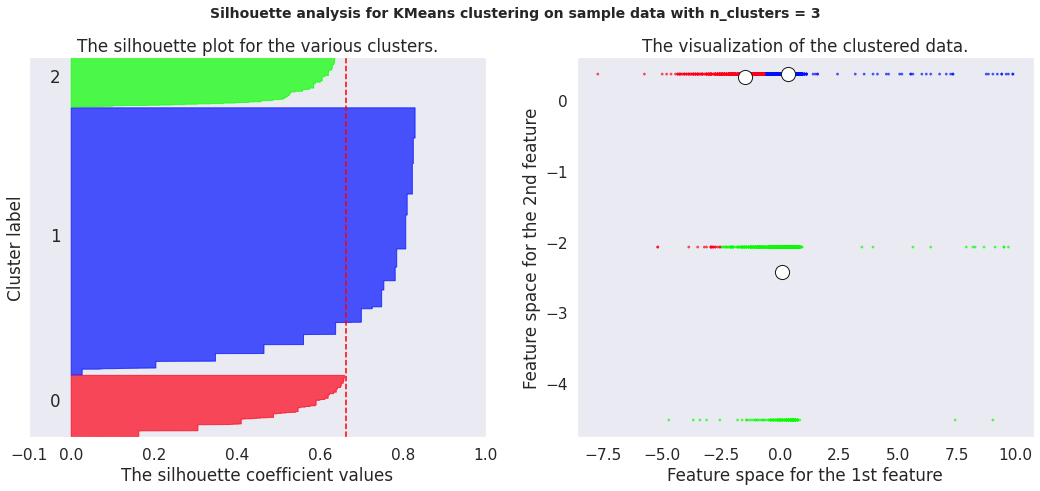

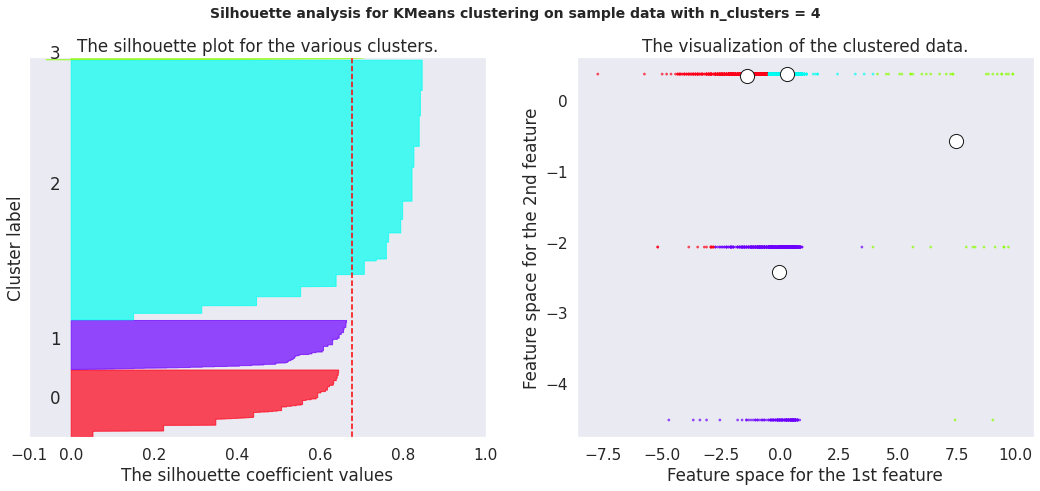

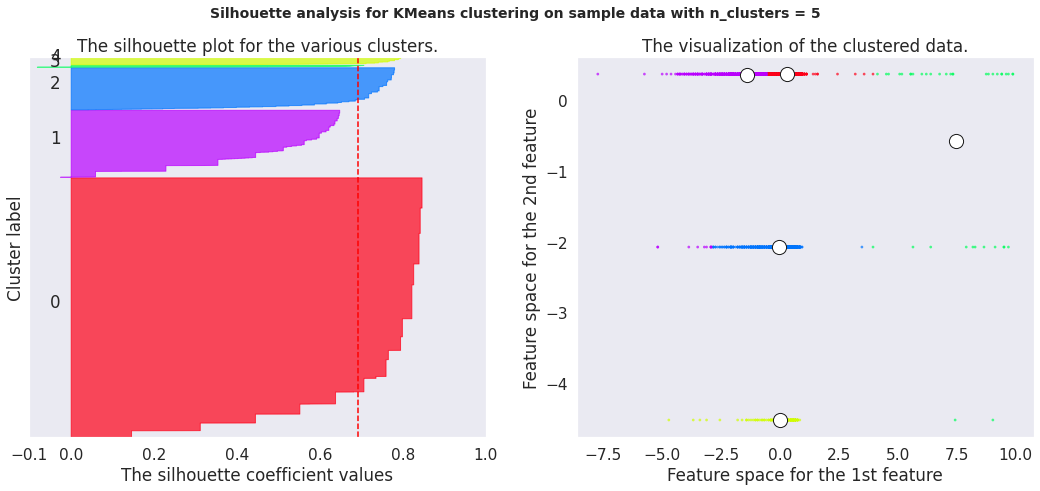

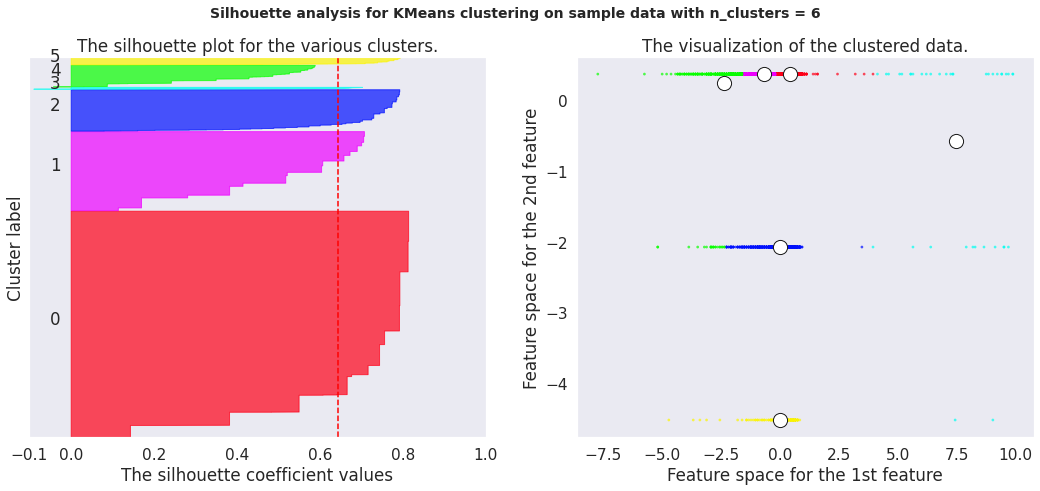

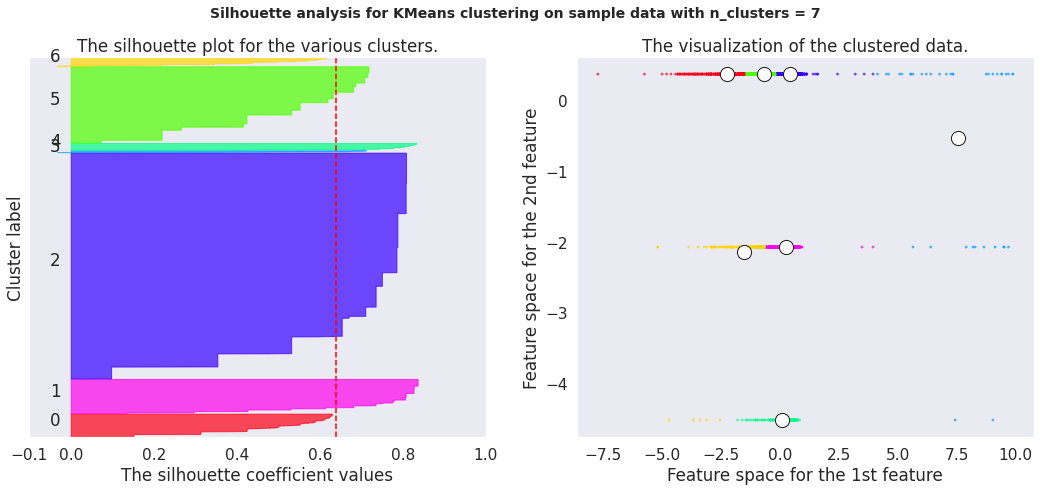

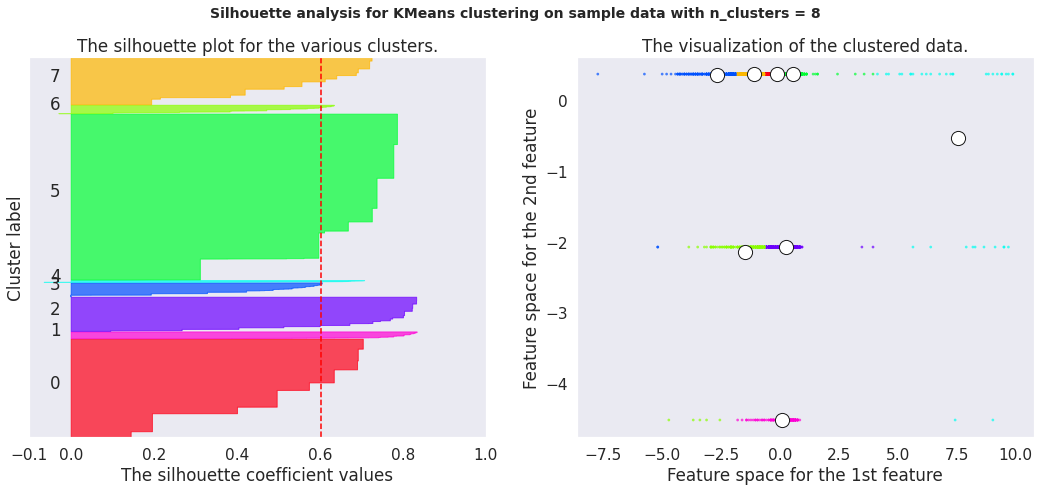

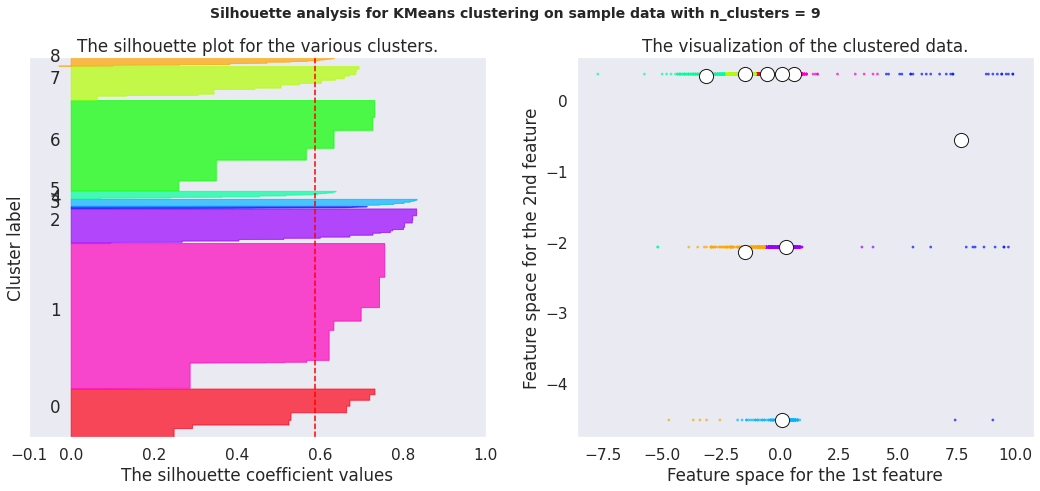

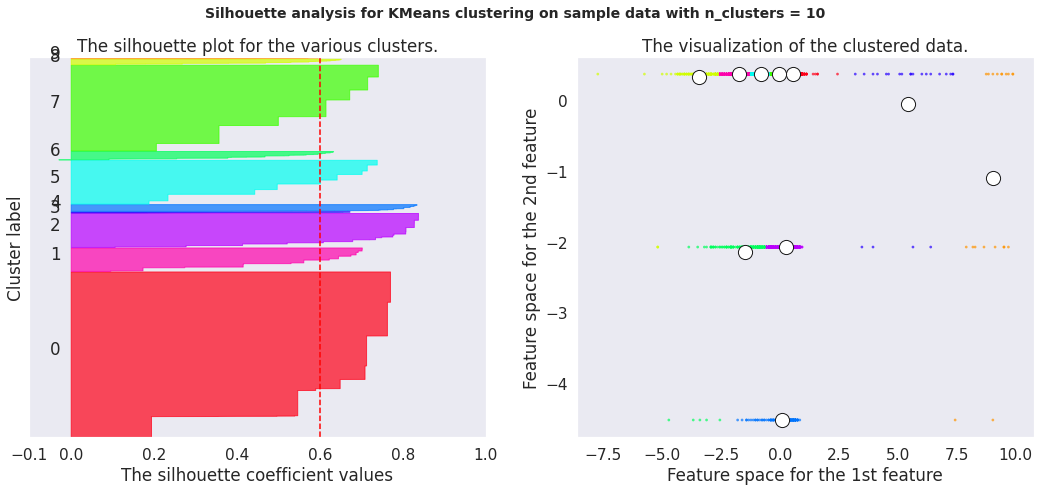

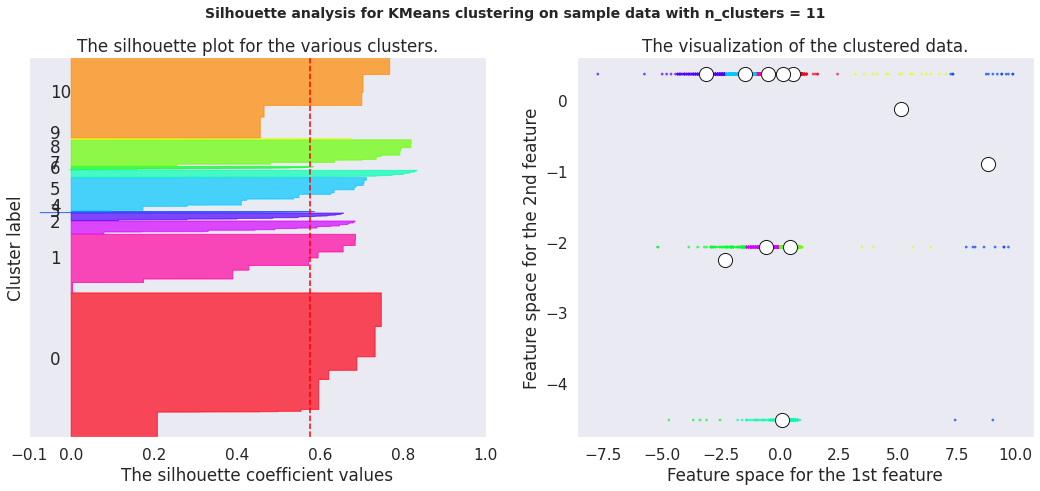

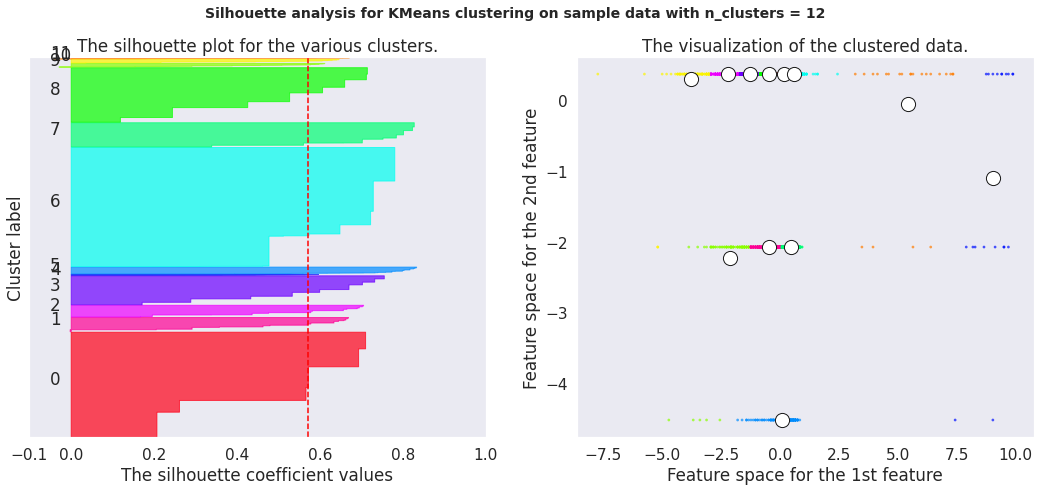

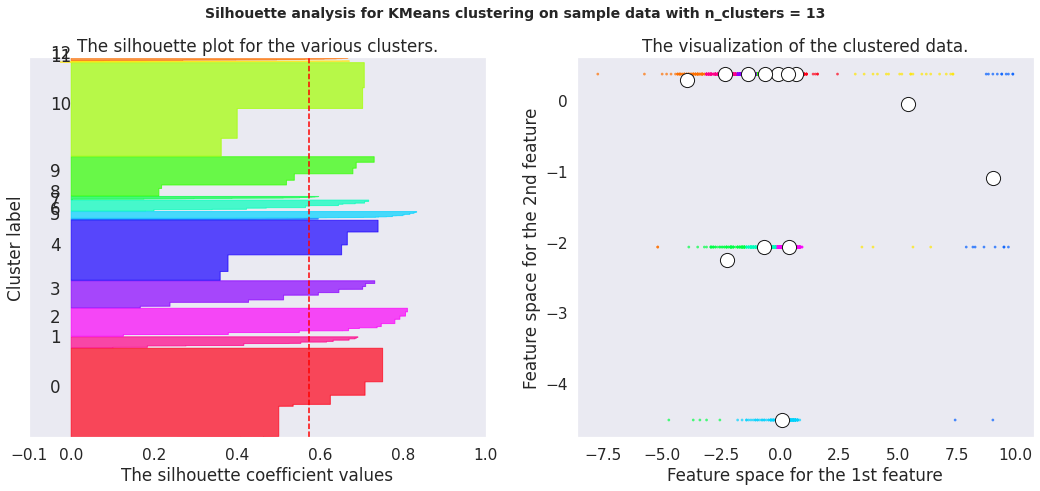

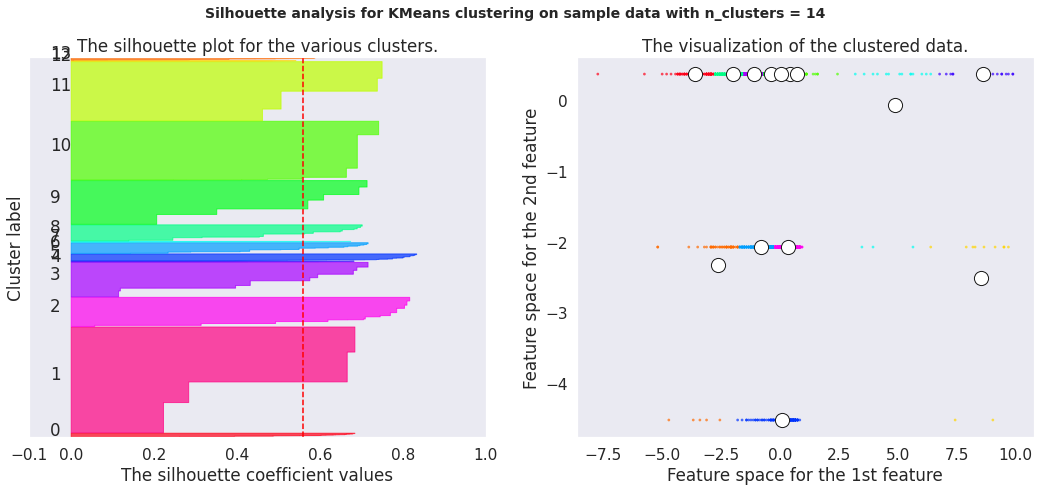

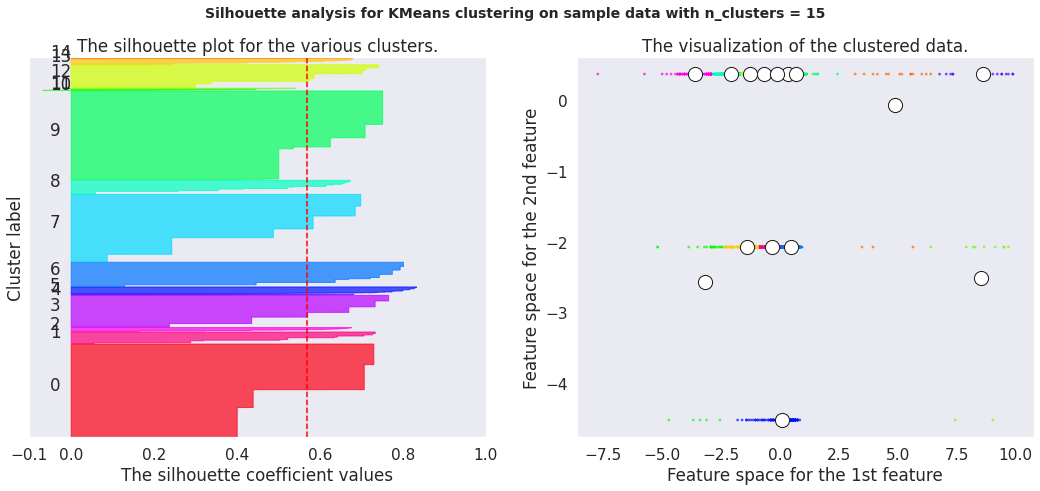

In [63]:
range_n_clusters = [i for i in range(2,16)]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns :

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)


    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]

    ax1.set_xlim([-0.1, 1])

    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.

    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.

    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    

    # Compute the silhouette scores for each sample :

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them :

        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.hsv_r(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle :

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
    #ax1.set_facecolor("white")
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.grid(False)

    # The vertical line for average silhouette score of all the values :

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed :

    colors = cm.hsv_r(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters :

    centers = clusterer.cluster_centers_

    # Draw white circles at cluster centers :

    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

  

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    ax2.grid(False)
    #ax2.set_facecolor("white") :
    
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [64]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### **ML Model - 2 - Elbow Curve**

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

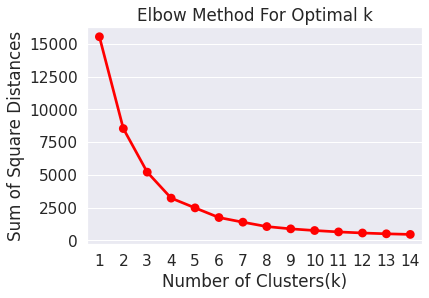

In [65]:
# ML Model - 2 Implementation
sum_of_square_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_square_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters :

sns.pointplot(x = list(sum_of_square_dist.keys()), y = list(sum_of_square_dist.values()),color="red")
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [66]:
# ML Model - 2 Implementation
kmeans = KMeans(n_clusters = 6 )
# fit the model
kmeans.fit(X)
# predict on the model
y_kmeans= kmeans.predict(X)

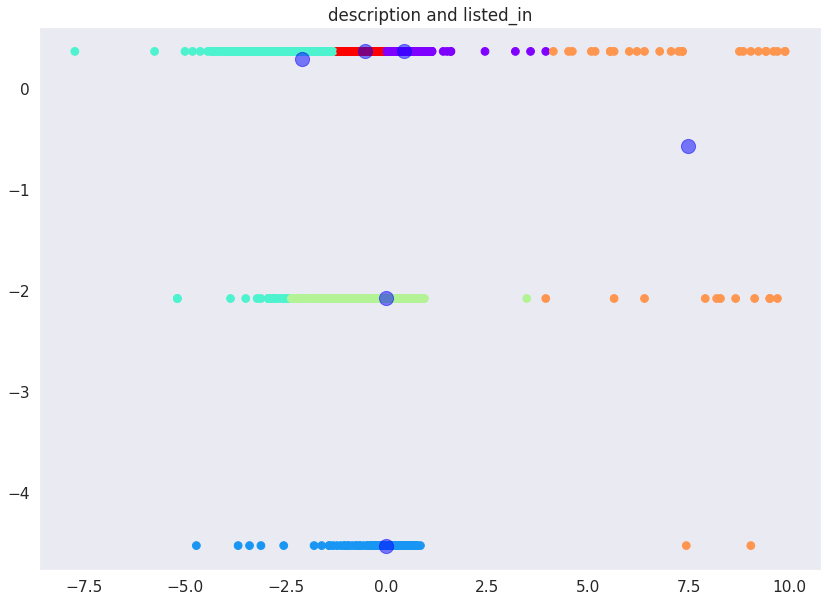

In [67]:
# Visualizing evaluation Metric Score chart
plt.figure(figsize=(14,10))
plt.title('description and listed_in')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=60, cmap='rainbow')
plt.grid(b=None)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=200, alpha=0.5)

#### 2. Cross- Validation & Hyperparameter Tuning

In [68]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### **ML Model - 3 - DBSCAN**

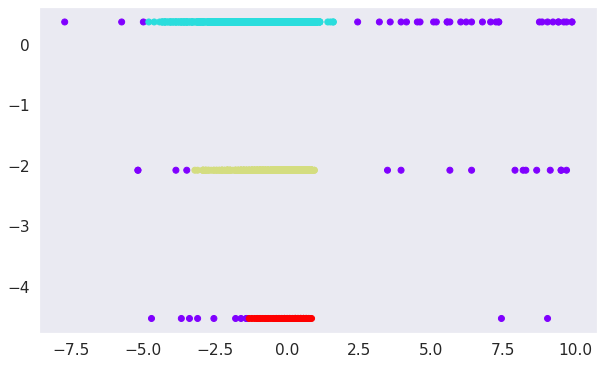

In [69]:
# ML Model - 3 Implementation
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=20).fit_predict(X)
plt.figure(figsize=(10,6))
plt.grid(b=None)
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap='rainbow')


### **ML Model - 4 - Dendogram**

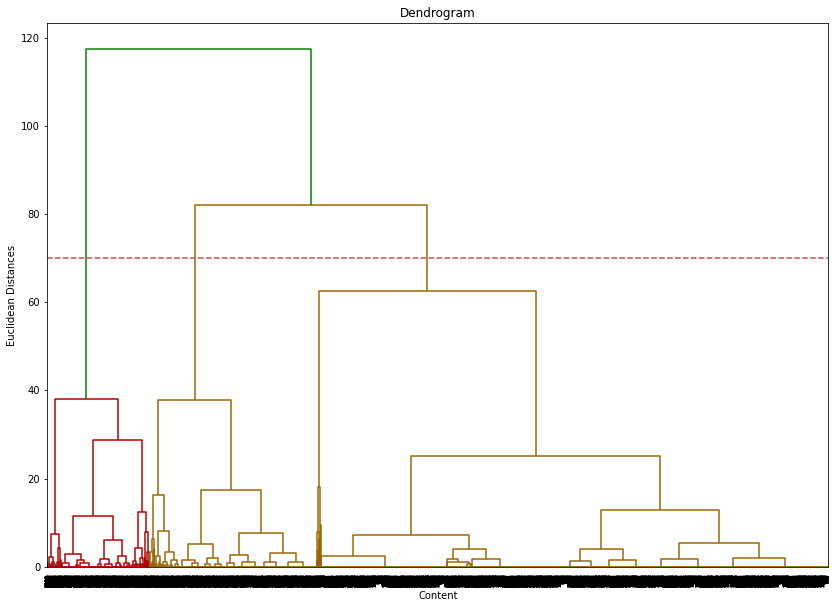

In [70]:
#  importing sch :
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(14,10))
plt.style.use('default')
sch.set_link_color_palette(['#b30000','#996600', '#b30086'])
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'),above_threshold_color="green")
plt.axhline(y=70, color='r', linestyle='--')
# find largest vertical distance we can make without crossing any other horizontal line :
plt.title('Dendrogram')
plt.xlabel('Content')
plt.ylabel('Euclidean Distances')
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [71]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [72]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [73]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [74]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***